__About Dataset__:  
Attributes:
* 'country' : indexed on country
* 'continent' : the continent on which the country belongs
* 'population' : population of the country
* 'day' : last updated on
* 'time' : last updated time
* 'Cases' : total number of cases
* 'Deaths' : total number of deaths
* 'Recovered' : total number of recovery
* 'Tests' : Number of tests conducted

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('covid_19.csv')

In [27]:
df.head()

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
0,Saint-Helena,Africa,6115.0,2024-06-30,2024-06-30T16:15:16+00:00,2166,2.0,NaN,NaN
1,Falkland-Islands,South-America,3539.0,2024-06-30,2024-06-30T16:15:16+00:00,1930,1930.0,NaN,8632.0
2,Montserrat,North-America,4965.0,2024-06-30,2024-06-30T16:15:16+00:00,1403,1376.0,8.0,17762.0
3,Diamond-Princess,NaN,NaN,2024-06-30,2024-06-30T16:15:16+00:00,712,699.0,13.0,NaN
4,Vatican-City,Europe,799.0,2024-06-30,2024-06-30T16:15:16+00:00,29,29.0,NaN,NaN


In [28]:
df.shape

(238, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     238 non-null    object 
 1   continent   236 non-null    object 
 2   population  229 non-null    float64
 3   day         238 non-null    object 
 4   time        238 non-null    object 
 5   Cases       238 non-null    int64  
 6   Recovered   190 non-null    float64
 7   Deaths      233 non-null    float64
 8   Tests       213 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 16.9+ KB


In [30]:
df.isnull().sum()

country        0
continent      2
population     9
day            0
time           0
Cases          0
Recovered     48
Deaths         5
Tests         25
dtype: int64

In [31]:
df.dropna(subset=['population'],inplace=True)
df.dropna(subset=['Recovered'],inplace=True)
df.dropna(subset=['Deaths'],inplace=True)
df.dropna(subset=['Tests'],inplace=True)

In [32]:
df.duplicated().sum()

0

In [33]:
df.describe()

,population,Cases,Recovered,Deaths,Tests
count,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02
mean,3.393555e+07,3.358564e+06,3.288112e+06,3.437705e+04,3.114130e+07
std,1.199166e+08,1.082718e+07,1.062387e+07,1.199160e+05,1.129389e+08
min,4.965000e+03,1.403000e+03,4.380000e+02,1.000000e+00,7.850000e+03
25%,1.369429e+06,3.613800e+04,3.233200e+04,3.160000e+02,4.004660e+05
50%,8.680837e+06,2.720100e+05,2.588880e+05,3.165000e+03,2.525756e+06
75%,2.791155e+07,1.734582e+06,1.724921e+06,1.805700e+04,1.346373e+07
max,1.448471e+09,1.118201e+08,1.098144e+08,1.219487e+06,1.186852e+09


In [34]:
df.country.nunique()

169

In [35]:
df['continent'].nunique()

6

In [37]:
df['Testing_Rate'] = df['Tests'] / df['population']
df['Case_Rate'] = df['Cases'] / df['population']
df['Active Cases'] = df['Cases'] - df['Recovered'] - df['Deaths']

## Pair Plot

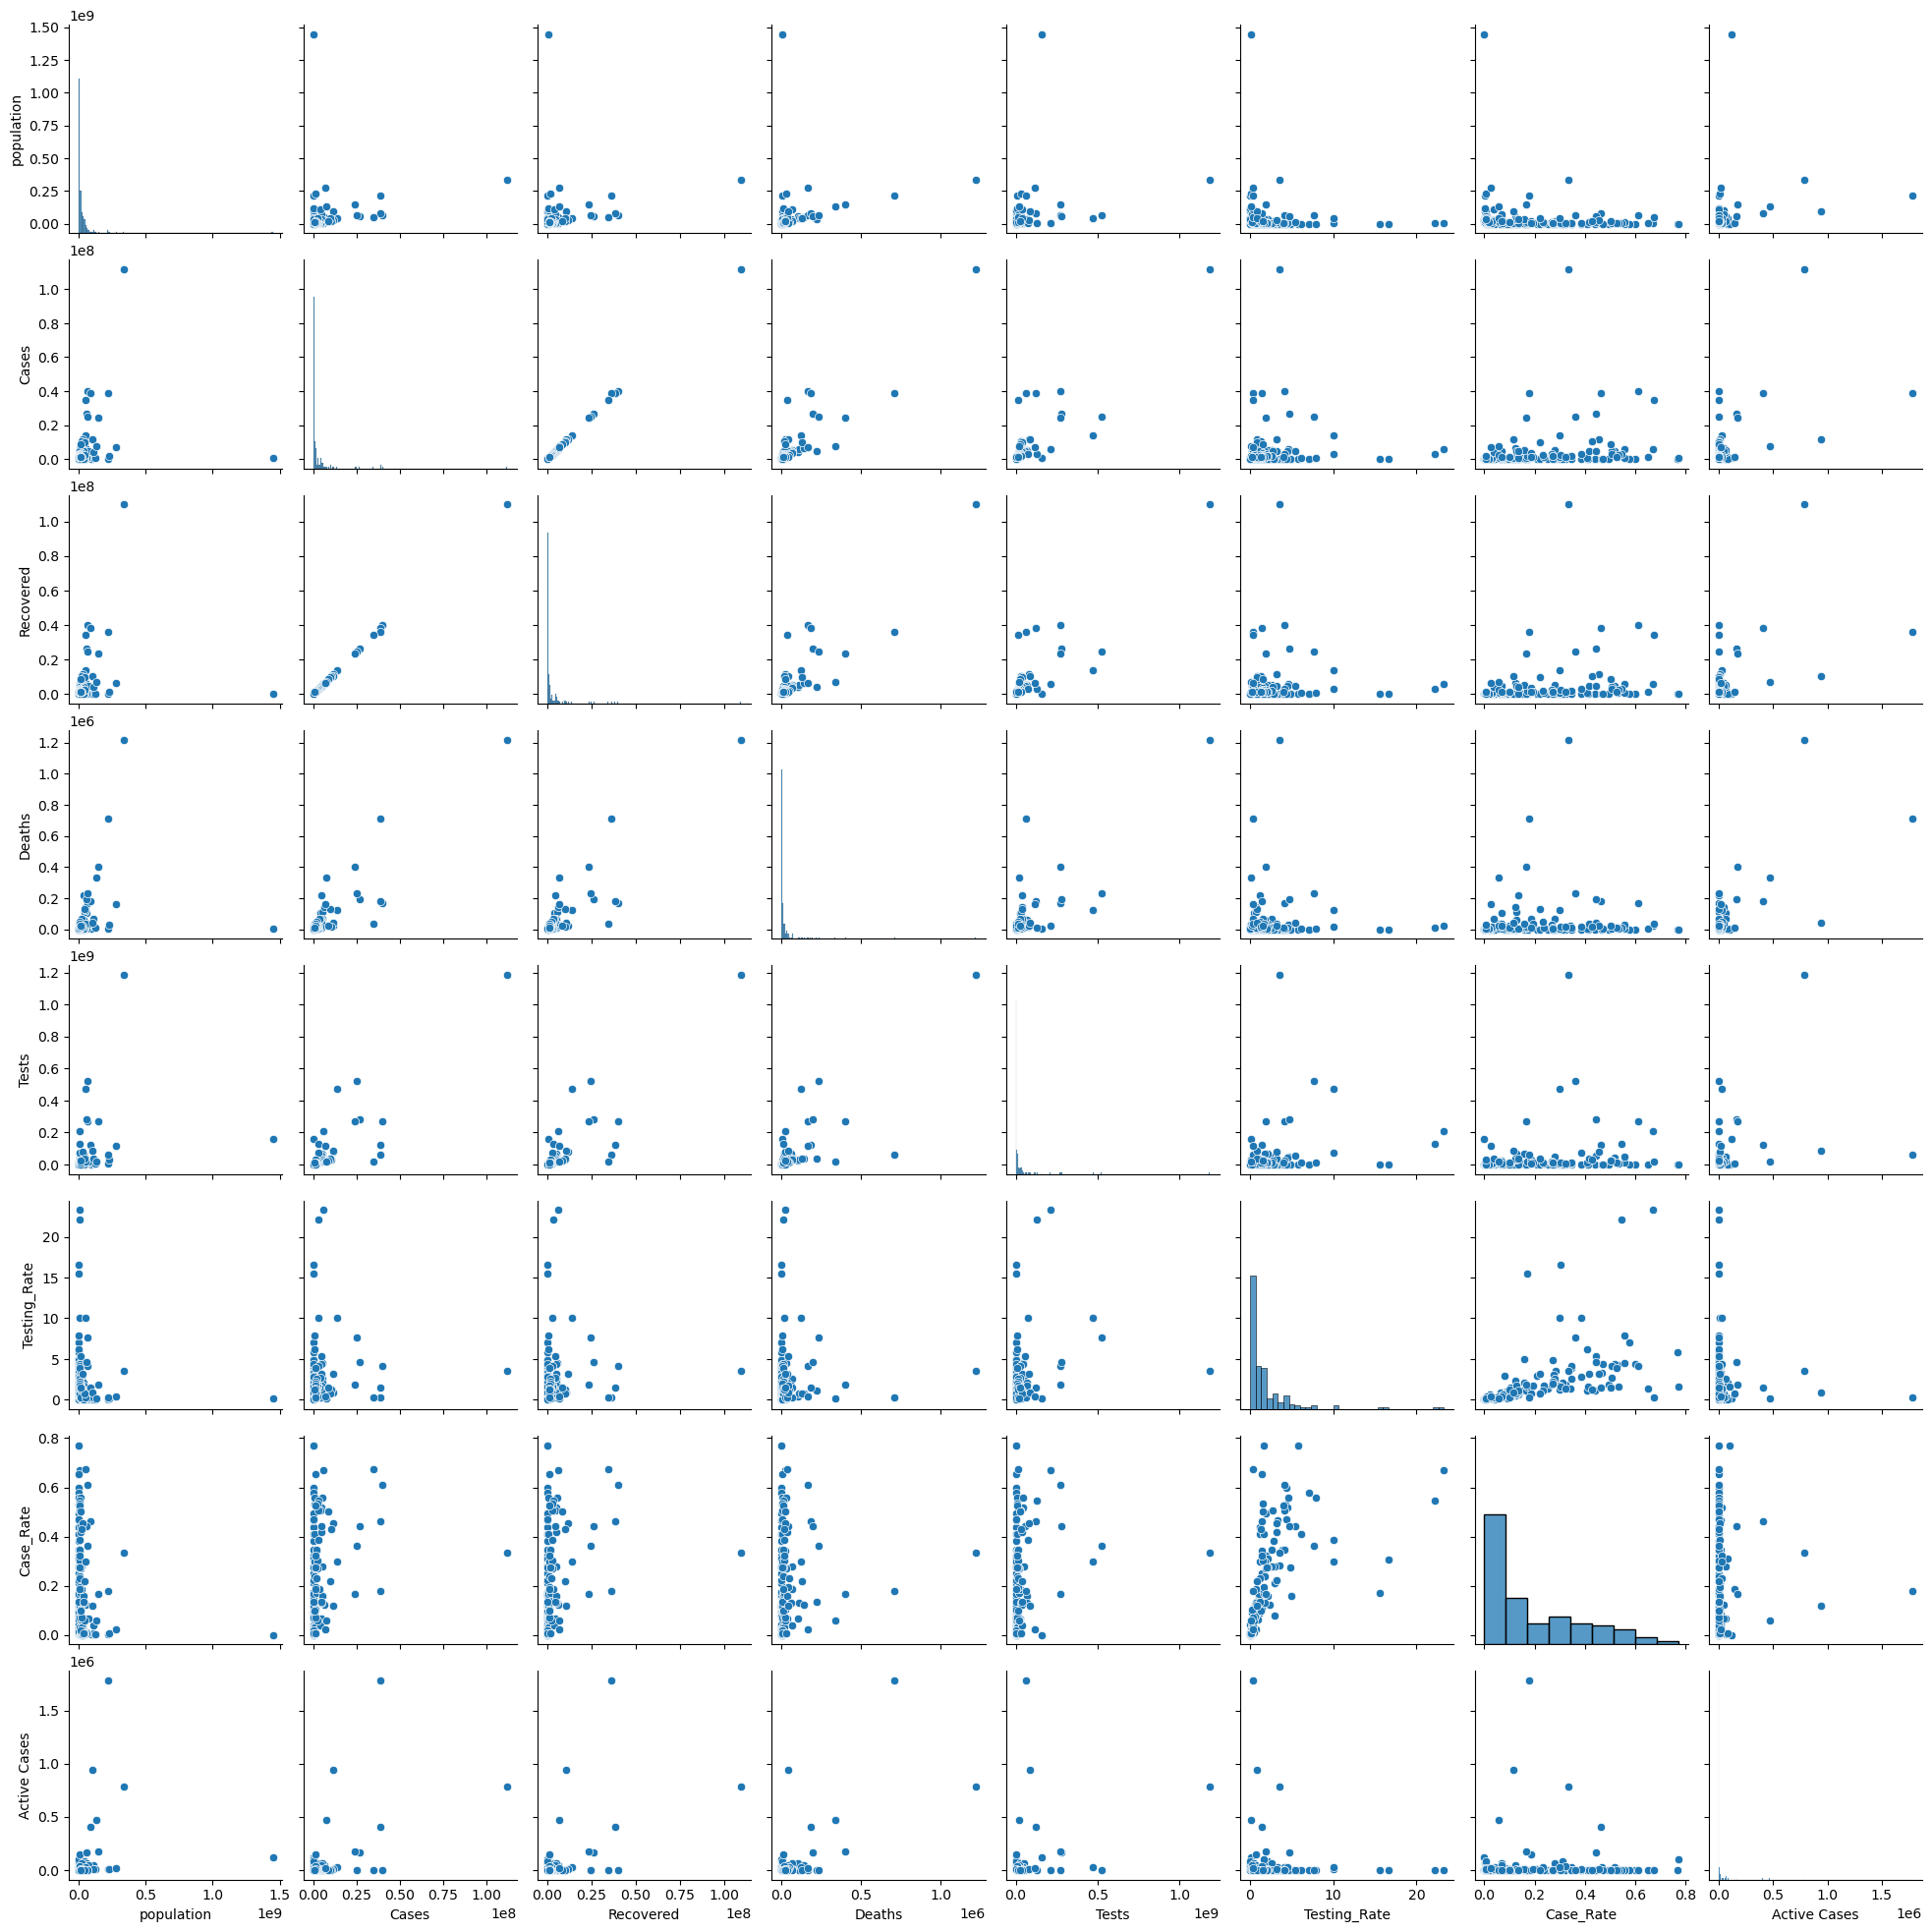

In [39]:
sns.pairplot(data=df)

## Deaths by Continent

C:\Users\negar\AppData\Local\Temp\ipykernel_4848\1238622963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths',y='continent', data=deathbyContinent, palette='cividis')


Text(0, 0.5, 'Continent')

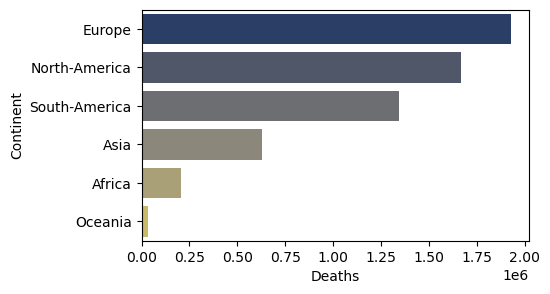

In [41]:
deathbyContinent = df.groupby('continent')['Deaths'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='Deaths',y='continent', data=deathbyContinent, palette='cividis')
plt.ylabel('Continent')

## Cases by Continent

C:\Users\negar\AppData\Local\Temp\ipykernel_4848\3010117995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='continent', y='Cases', palette='cividis')


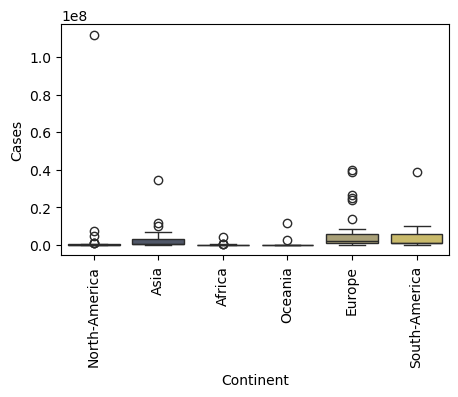

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='continent', y='Cases', palette='cividis')
plt.xlabel('Continent')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

## Deaths by Country

C:\Users\negar\AppData\Local\Temp\ipykernel_4848\1154196552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths',y='country', data=deathbyCountry, palette='cividis')


Text(0, 0.5, 'Country')

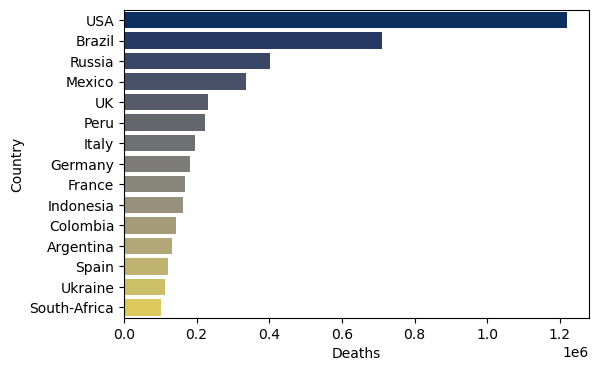

In [45]:
deathbyCountry = df.groupby('country')['Deaths'].sum().sort_values(ascending=False).reset_index().head(15)
plt.figure(figsize=(6,4))
sns.barplot(x='Deaths',y='country', data=deathbyCountry, palette='cividis')
plt.ylabel('Country')

## Cases by Country

C:\Users\negar\AppData\Local\Temp\ipykernel_4848\1157279710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cases',y='country', data=casesbyCountry, palette='cividis')


Text(0, 0.5, 'Country')

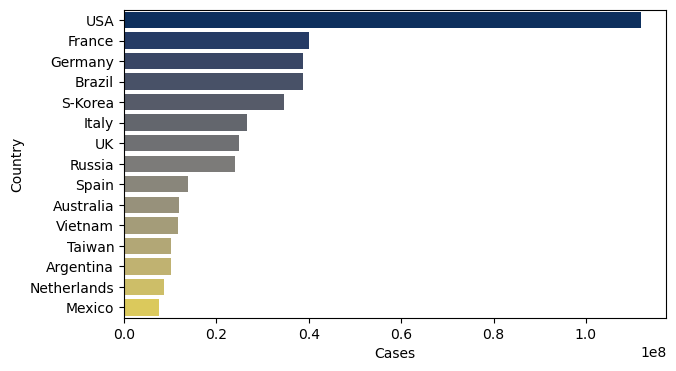

In [47]:
casesbyCountry = df.groupby('country')['Cases'].sum().sort_values(ascending=False).reset_index().head(15)
plt.figure(figsize=(7,4))
sns.barplot(x='Cases',y='country', data=casesbyCountry, palette='cividis')
plt.ylabel('Country')

## Corrolation

In [49]:
df_corr = df.corr(numeric_only=True)
df_corr

,population,Cases,Recovered,Deaths,Tests,Testing_Rate,Case_Rate,Active Cases
population,1.000000,0.236048,0.233388,0.272309,0.304887,-0.081935,-0.123764,0.252894
Cases,0.236048,1.000000,0.999862,0.891011,0.860752,0.105958,0.257422,0.568058
Recovered,0.233388,0.999862,1.000000,0.885428,0.862549,0.108168,0.260940,0.554809
Deaths,0.272309,0.891011,0.885428,1.000000,0.798248,0.039729,0.088098,0.699288
Tests,0.304887,0.860752,0.862549,0.798248,1.000000,0.273163,0.199763,0.349114
Testing_Rate,-0.081935,0.105958,0.108168,0.039729,0.273163,1.000000,0.555450,-0.038891
Case_Rate,-0.123764,0.257422,0.260940,0.088098,0.199763,0.555450,1.000000,0.025508
Active Cases,0.252894,0.568058,0.554809,0.699288,0.349114,-0.038891,0.025508,1.000000


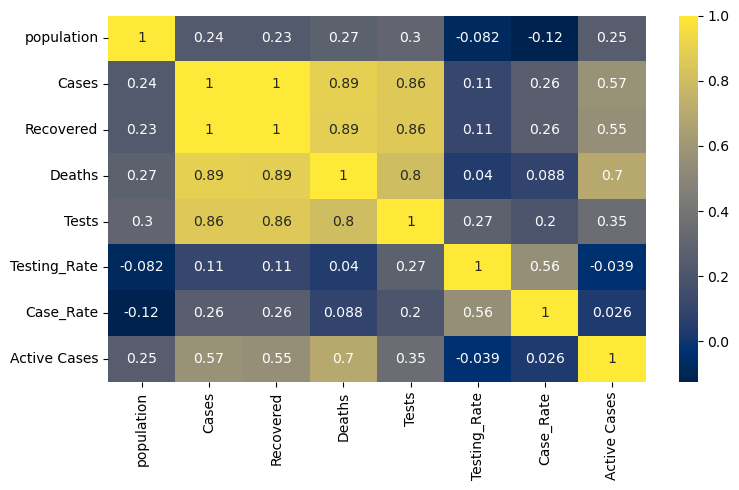

In [50]:
plt.figure(figsize=(8,5))
sns.heatmap(df_corr, cmap='cividis', annot=True)
plt.tight_layout()

## Tests by Country

C:\Users\negar\AppData\Local\Temp\ipykernel_4848\2955700388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tests',y='country', data=testsbyCountry, palette='cividis')


Text(0, 0.5, 'Country')

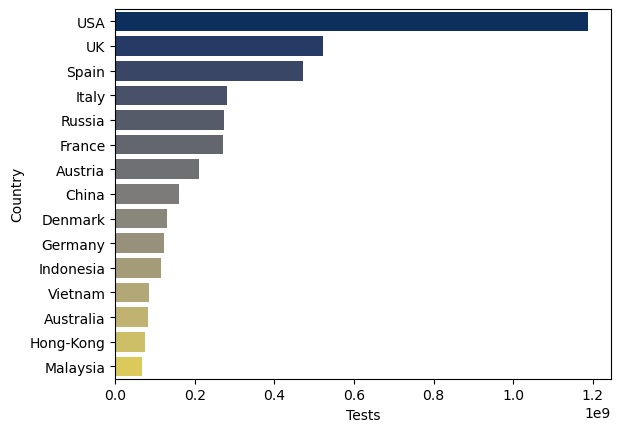

In [52]:
testsbyCountry = df.groupby('country')['Tests'].sum().sort_values(ascending=False).reset_index().head(15)
sns.barplot(x='Tests',y='country', data=testsbyCountry, palette='cividis')
plt.ylabel('Country')

## Testing Rate and Case Rate

Text(0.5, 1.0, 'Relationship Between Testing Rate and Case Rate')

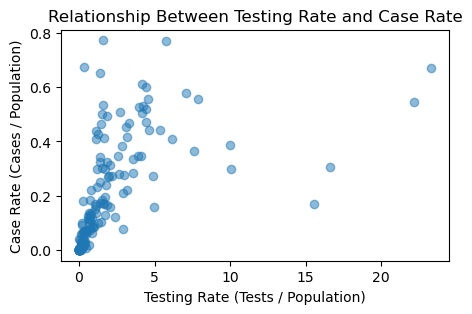

In [54]:
plt.figure(figsize=(5, 3))
plt.scatter(df['Testing_Rate'], df['Case_Rate'], alpha=0.5)
plt.xlabel('Testing Rate (Tests / Population)')
plt.ylabel('Case Rate (Cases / Population)')
plt.title('Relationship Between Testing Rate and Case Rate')

## Population and Cases

Text(0, 0.5, 'Cases')

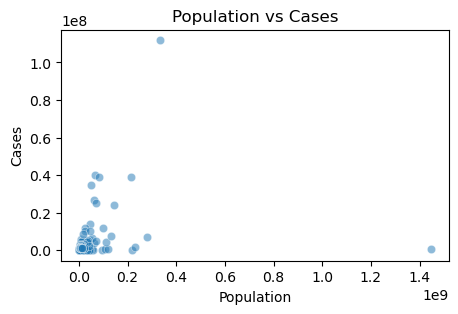

In [56]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df,x='population',y='Cases', alpha=0.5)
plt.title('Population vs Cases')
plt.xlabel('Population')
plt.ylabel('Cases')

## Active Cases per Country

C:\Users\negar\AppData\Local\Temp\ipykernel_4848\3903671761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Active Cases',y='country', data=activebyCountry, palette='cividis')


Text(0, 0.5, 'Country')

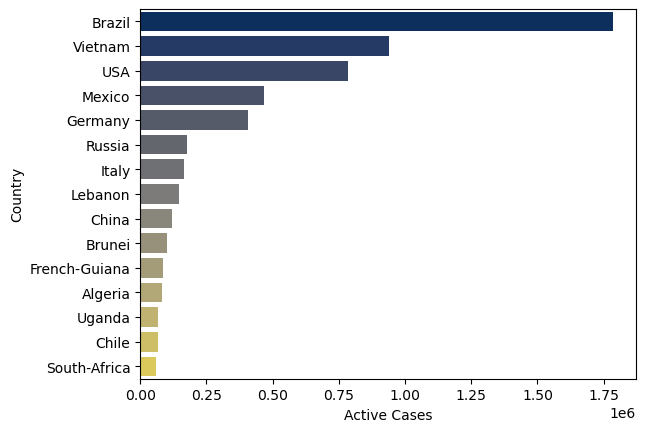

In [58]:
activebyCountry = df.groupby('country')['Active Cases'].sum().sort_values(ascending=False).reset_index().head(15)
sns.barplot(x='Active Cases',y='country', data=activebyCountry, palette='cividis')
plt.ylabel('Country')